In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

# Reading Dataset

In [75]:
df = pd.read_csv("data.csv")
df.head()

,ID,NUMBER,REDUNDANT_IO,LOG_GC,APPROX,INDUCTION,IBURST,DPRESERVE_FD,DPRESERVE_SD,NODEMERGE
0,19068,46,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,2,2,0
2,19069,46,0,0,0,0,0,0,0,0
3,5,2,0,0,0,0,0,2,2,0
4,19070,47,0,0,0,0,0,0,0,0


# **_RQ1 :  What are the log reduction numbers across various reduction techniques?_**

In [76]:
tn = df.columns[2:]
drop_count = []
for tech in tn:
  print(tech + " " + str(df[df[tech] == 2].shape[0]))
  drop_count.append(df[df[tech] == 2].shape[0])
  

REDUNDANT_IO 48178
LOG_GC 6594
APPROX 172907
INDUCTION 5157
IBURST 113362
DPRESERVE_FD 220989
DPRESERVE_SD 224390
NODEMERGE 12445


Text(0.5, 0, 'Techniques')

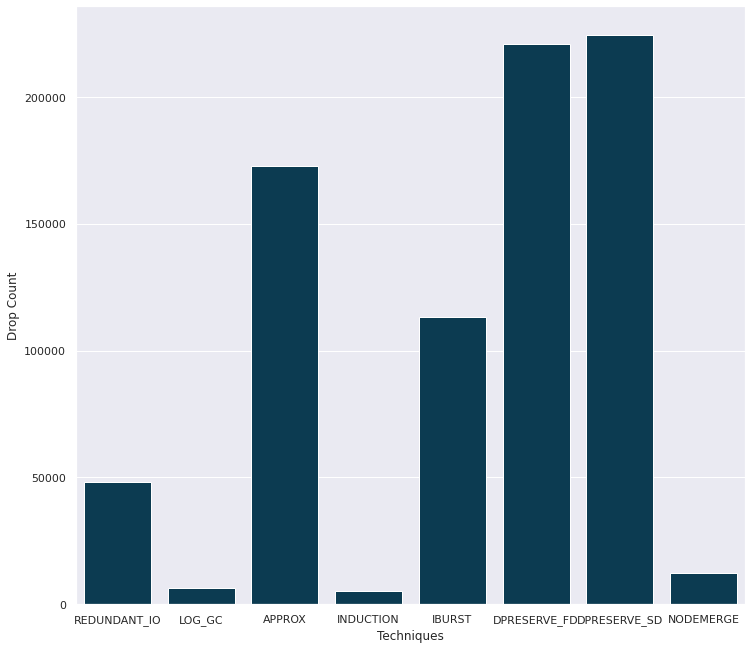

In [129]:
data_bar = {}
data_bar["Techniques"] = tn
data_bar["Entries_Dropped"] = drop_count

# sns.set_style("grid")
sns.set(rc={'figure.figsize':(12,11)})
ax = sns.barplot(x=data_bar["Techniques"], y=data_bar["Entries_Dropped"], color="#003f5c")
ax.set_ylabel("Drop Count")
ax.set_xlabel("Techniques")

# _**RQ2 :  What is the overlap between the various reduction techniques? How independent is one technique of the rest?**_

In [124]:
def print_matrix(matrix):
  l = [len(max(i, key=len)) for i in zip(*matrix)]
  for item in matrix:
      for idx in range(len(l)):
          print(item[idx].ljust(l[idx]), end='   ')
      print()

# Events filtered by both Technique A (row) and by Technique B (colm) divided by events filtered by either A or B i.e (A ∩ B) divided by (A ∪ B)
overlapp_matrix = []
overlapp_matrix.append(list(tn))
overlapp_matrix[0].insert(0, "Techniques")
for t1 in tn:
  temp = []
  temp.append(t1)
  for t2 in tn:
    inter_count = 0
    union_count = 0
    for i in range(len(df)):
      if( (df.loc[i,t1] == 2) and (df.loc[i,t2] == 2)):
        inter_count += 1
        union_count += 1
      elif (df.loc[i,t1] == 2 or df.loc[i,t2] == 2):
        union_count += 1
    overlapp = round((inter_count/union_count) * 100.0, 2)
    temp.append(str(overlapp))
  overlapp_matrix.append(temp)

print("---- Overlap Matrix ----")
print("Events filtered by both Technique A (row) and by Technique B (colm) divided by events filtered by either A or B i.e (A ∩ B) divided by (A ∪ B)\n")
print_matrix(overlapp_matrix)

---- Overlap Matrix ----
Events filtered by both Technique A (row) and by Technique B (colm) divided by events filtered by either A or B i.e (A ∩ B) divided by (A ∪ B)

Techniques     REDUNDANT_IO   LOG_GC   APPROX   INDUCTION   IBURST   DPRESERVE_FD   DPRESERVE_SD   NODEMERGE   
REDUNDANT_IO   100.0          2.86     26.88    0.0         42.5     21.8           21.47          8.1         
LOG_GC         2.86           100.0    0.97     0.0         1.43     2.96           2.92           0.0         
APPROX         26.88          0.97     100.0    0.36        45.18    75.8           74.66          4.16        
INDUCTION      0.0            0.0      0.36     100.0       0.01     1.81           2.21           4.34        
IBURST         42.5           1.43     45.18    0.01        100.0    51.01          50.26          5.8         
DPRESERVE_FD   21.8           2.96     75.8     1.81        51.01    100.0          98.48          5.32        
DPRESERVE_SD   21.47          2.92     74.66   

In [125]:
# Events filtered by Technique A (row) that are not filtered by Technique B (colm) divided by events filtered by either A or B i.e (A - B) divided by (A ∪ B)

unique_mat = []
unique_mat.append(list(tn))
unique_mat[0].insert(0, "Techniques")
for t1 in tn:
  temp = []
  temp.append(t1)
  for t2 in tn:
    inter_count = 0
    union_count = 0
    for i in range(len(df)):
      if( (df.loc[i,t1] == 2) and not (df.loc[i,t2] == 2)):
        inter_count += 1
        union_count += 1
      elif (df.loc[i,t1] == 2 or df.loc[i,t2] == 2):
        union_count += 1
    unique = round((inter_count/union_count) * 100.0, 2)
    temp.append(str(unique))
  unique_mat.append(temp)

print("---- Unique Event Compression Matrix ----")
print("Events filtered by Technique A (row) that are not filtered by Technique B (colm) divided by events filtered by either A or B i.e (A - B) divided by (A ∪ B)\n")
print_matrix(unique_mat)

---- Unique Event Compression Matrix ----
Events filtered by Technique A (row) that are not filtered by Technique B (colm) divided by events filtered by either A or B i.e (A - B) divided by (A ∪ B)

Techniques     REDUNDANT_IO   LOG_GC   APPROX   INDUCTION   IBURST   DPRESERVE_FD   DPRESERVE_SD   NODEMERGE   
REDUNDANT_IO   0.0            87.62    0.77     90.33       0.0      0.0            0.0            77.81       
LOG_GC         9.52           0.0      2.74     56.11       4.14     0.02           0.02           34.63       
APPROX         72.35          96.29    0.0      97.09       42.51    1.37           1.35           93.01       
INDUCTION      9.67           43.89    2.55     0.0         4.35     0.51           0.09           26.23       
IBURST         57.5           94.42    12.31    95.65       0.0      0.19           0.17           89.53       
DPRESERVE_FD   78.2           97.02    22.83    97.68       48.8     0.0            0.0            94.39       
DPRESERVE_SD   78

In [126]:
# Events filtered by Technique A (row) that are not filtered by Technique B (colm) divided by events filtered by A i.e (A - B) divided by (A)

unique_mat2 = []
unique_mat2.append(list(tn))
unique_mat2[0].insert(0, "Techniques")
for t1 in tn:
  temp = []
  temp.append(t1)
  for t2 in tn:
    inter_count = 0
    union_count = 0
    for i in range(len(df)):
      if( (df.loc[i,t1] == 2) and not (df.loc[i,t2] == 2)):
        inter_count += 1
        union_count += 1
      elif (df.loc[i,t1] == 2):
        union_count += 1
    unique = round((inter_count/union_count) * 100.0, 2)
    temp.append(str(unique))
  unique_mat2.append(temp)

print("---- Unique Event Compression Matrix (Second variation) ----")
print("Events filtered by Technique A (row) that are not filtered by Technique B (colm) divided by events filtered by A i.e (A - B) divided by (A)\n")
print_matrix(unique_mat2)

---- Unique Event Compression Matrix (Second variation) ----
Events filtered by Technique A (row) that are not filtered by Technique B (colm) divided by events filtered by A i.e (A - B) divided by (A)

Techniques     REDUNDANT_IO   LOG_GC   APPROX   INDUCTION   IBURST   DPRESERVE_FD   DPRESERVE_SD   NODEMERGE   
REDUNDANT_IO   0.0            96.84    2.78     100.0       0.0      0.0            0.0            90.57       
LOG_GC         76.9           0.0      73.84    100.0       74.29    0.76           0.76           100.0       
APPROX         72.91          99.0     0.0      99.63       48.48    1.78           1.78           95.72       
INDUCTION      100.0          100.0    87.57    0.0         99.88    21.93          3.72           85.81       
IBURST         57.5           98.5     21.41    99.99       0.0      0.37           0.34           93.92       
DPRESERVE_FD   78.2           97.04    23.15    98.18       48.89    0.0            0.0            94.67       
DPRESERVE_SD  

# **_RQ3 :  What is the system call distribution (fileIO, process, network) of the events dropped across various techniques?_**

In [80]:
# http://linasm.sourceforge.net/docs/syscalls/filesystem.php#file
# syscall distribution

file_syscalls = [3,85,2, 257,303,304,319,133,259,82,264,316,76,77,285,83,258,84,79,80,81,161,78,217,212,86,87,88,263,265,267,266,95,4,5,6,262,90,91,268,92,93,94,260,132,235,261,280,21,269, 188,189,190,191,192,193,194,195,196,197,198,199,16,72,32,33,292,73,0,19,17,295,1,20,18,296,8,40,26,74,75,277,162,306,206,207,208,209,210,23,270,7,271,213,291,233,232,281,253,254,294,255,300,301,221,187,318]
process_syscalls = [56,57,58,59,322,60,231,61,247,39,110,186,112,124,109,121,111,105,102,106,104,117,118,119,120,113,114,122,123,107,108,116,115,308,160,97,302,98,314,315,144,145,142,143,203,204,146,147,148,24,141,140,251,252,12,9,11,25,10,28,149,325,151,150,152,27,324,154,126,125,205,211,218,158,134,157,317,101,310,311,312,272]
network_syscalls = [41,51,52,53,54,55,49,50,43,288,42,48,45,47,299,44,46,307,170,171,321]

# Bates -- Problem with this approach; read/write syscalls are file-based, but can also be used for networking if you pass in a Socket Descriptor instead of a File Descriptor

file_c = 0
process_c = 0
network_c = 0
other_c = 0

dist_column = []
for i in range(len(df)):
    syscall_number = df.loc[i,"NUMBER"]
    if (syscall_number in file_syscalls):
      file_c +=1
      dist_column.append("file") 
    elif (syscall_number in process_syscalls):
      process_c += 1
      dist_column.append("process")
    elif (syscall_number in network_syscalls):
      network_c += 1
      dist_column.append("network")
    else:
      other_c += 1
      dist_column.append("other")


df["syscall_type"] = dist_column

print("Total syscalls :", len(df))
print("File based system calls: ", file_c)
print("Process based system calls: ", process_c)
print("Network based system calls: ", network_c)
print("Other system calls: ", other_c)


Total syscalls : 249489
File based system calls:  139934
Process based system calls:  1494
Network based system calls:  108061
Other system calls:  0


In [82]:
n_count = [0] * 8
f_count = [0] * 8
p_count = [0] * 8

for i in range(len(df)):
    syscall_type = df.loc[i,"syscall_type"]
    for ind,t in enumerate(tn):
      if(df.loc[i,t] == 2):
        if(syscall_type == "file"):
          f_count[ind] += 1
        if(syscall_type == "process"):
          p_count[ind] += 1
        if(syscall_type == "network"):
          n_count[ind] += 1
      
for i in range(len(p_count)):
  p_count[i] += (n_count[i] + f_count[i])

for i in range(len(n_count)):
  n_count[i] += f_count[i]

Text(0.5, 0, 'Techniques')

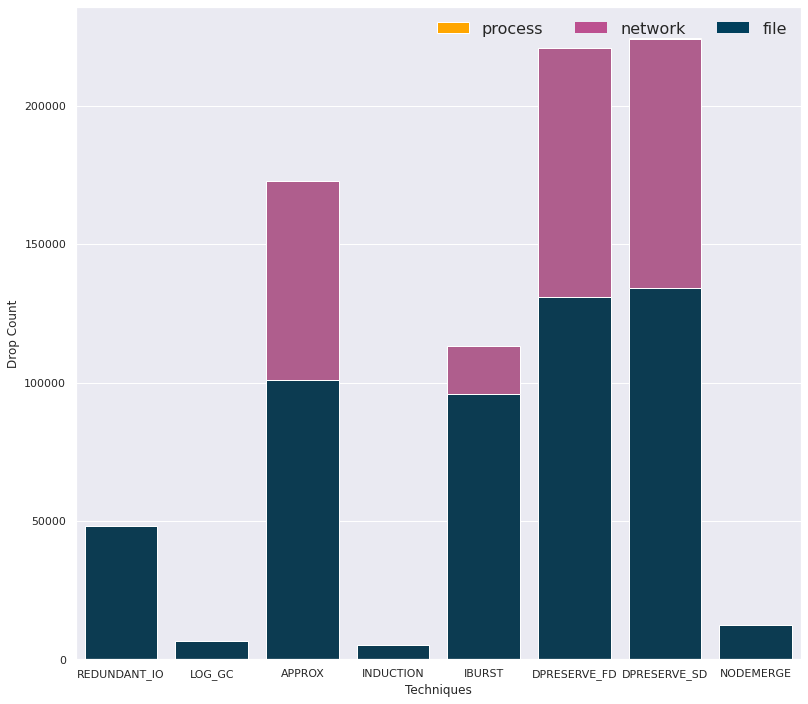

In [128]:
from matplotlib import pyplot as plt

#Set general plot properties
# sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (13,12)})

#Plots
sns.barplot(x = tn, y = p_count, color = "#ffa600")
sns.barplot(x = tn, y = n_count, color = "#bc5090")
bottom_plot = sns.barplot(x = tn, y = f_count, color = "#003f5c")

redbar = plt.Rectangle((0,0),1,1,fc="#ffa600")
bluebar = plt.Rectangle((0,0),1,1,fc="#bc5090",  edgecolor = 'none')
greenbar = plt.Rectangle((0,0),1,1,fc="#003f5c",  edgecolor = 'none')
l = plt.legend([redbar, bluebar, greenbar], ['process', 'network', 'file'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
# sns.despine(left=True)
bottom_plot.set_ylabel("Drop Count")
bottom_plot.set_xlabel("Techniques")

# Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(12)

# **_RQ4 : Which set of techniques, both intuitively and experimentally, when used together provide us the maximum reduction?_**

In [120]:
def combinationUtil(arr, n, r,index, data, i,sub_array):  
  if(index == r):
    temp = [] 
    for j in range(r):
      temp.append(data[j])
    sub_array.append(temp)
    return
  if(i >= n): 
    return
  data[index] = arr[i] 
  combinationUtil(arr, n, r,  index + 1, data, i + 1, sub_array) 
  combinationUtil(arr, n, r, index,data, i + 1, sub_array) 

def getCombinations(arr, n, r):  
  data = list(range(r))
  sub_array = []
  combinationUtil(arr, n, r,  0, data, 0,sub_array)
  return sub_array



In [121]:
subset2_array = getCombinations(tn, len(tn) , 2)
subset3_array = getCombinations(tn, len(tn) , 3)

In [122]:
subset2_count = []

for techniques in subset2_array:
  count = 0
  for i in range(len(df)):
    for t in techniques:
      if(df.loc[i,t] == 2):
        count+=1
        break
  subset2_count.append((techniques, count))

subset2_count.sort(reverse= True, key = lambda x: x[1])

subset2_count

[(['APPROX', 'DPRESERVE_SD'], 227463),
 (['IBURST', 'DPRESERVE_SD'], 224778),
 (['INDUCTION', 'DPRESERVE_SD'], 224582),
 (['DPRESERVE_SD', 'NODEMERGE'], 224547),
 (['LOG_GC', 'DPRESERVE_SD'], 224440),
 (['REDUNDANT_IO', 'DPRESERVE_SD'], 224390),
 (['DPRESERVE_FD', 'DPRESERVE_SD'], 224390),
 (['APPROX', 'DPRESERVE_FD'], 224065),
 (['INDUCTION', 'DPRESERVE_FD'], 222120),
 (['DPRESERVE_FD', 'NODEMERGE'], 221645),
 (['IBURST', 'DPRESERVE_FD'], 221412),
 (['LOG_GC', 'DPRESERVE_FD'], 221039),
 (['REDUNDANT_IO', 'DPRESERVE_FD'], 220989),
 (['APPROX', 'IBURST'], 197181),
 (['APPROX', 'NODEMERGE'], 177952),
 (['LOG_GC', 'APPROX'], 177776),
 (['APPROX', 'INDUCTION'], 177423),
 (['REDUNDANT_IO', 'APPROX'], 174246),
 (['IBURST', 'NODEMERGE'], 118915),
 (['INDUCTION', 'IBURST'], 118513),
 (['LOG_GC', 'IBURST'], 118261),
 (['REDUNDANT_IO', 'IBURST'], 113362),
 (['REDUNDANT_IO', 'NODEMERGE'], 56079),
 (['REDUNDANT_IO', 'INDUCTION'], 53335),
 (['REDUNDANT_IO', 'LOG_GC'], 53249),
 (['LOG_GC', 'NODEMERG

In [123]:
subset3_count = []

for techniques in subset3_array:
  count = 0
  for i in range(len(df)):
    for t in techniques:
      if(df.loc[i,t] == 2):
        count+=1
        break
  subset3_count.append((techniques, count))

subset3_count.sort(reverse= True, key = lambda x: x[1])
subset3_count

[(['APPROX', 'IBURST', 'DPRESERVE_SD'], 227786),
 (['APPROX', 'INDUCTION', 'DPRESERVE_SD'], 227641),
 (['APPROX', 'DPRESERVE_SD', 'NODEMERGE'], 227603),
 (['LOG_GC', 'APPROX', 'DPRESERVE_SD'], 227481),
 (['REDUNDANT_IO', 'APPROX', 'DPRESERVE_SD'], 227463),
 (['APPROX', 'DPRESERVE_FD', 'DPRESERVE_SD'], 227463),
 (['APPROX', 'INDUCTION', 'DPRESERVE_FD'], 225182),
 (['INDUCTION', 'IBURST', 'DPRESERVE_SD'], 224970),
 (['IBURST', 'DPRESERVE_SD', 'NODEMERGE'], 224935),
 (['LOG_GC', 'IBURST', 'DPRESERVE_SD'], 224790),
 (['REDUNDANT_IO', 'IBURST', 'DPRESERVE_SD'], 224778),
 (['IBURST', 'DPRESERVE_FD', 'DPRESERVE_SD'], 224778),
 (['INDUCTION', 'DPRESERVE_SD', 'NODEMERGE'], 224739),
 (['APPROX', 'DPRESERVE_FD', 'NODEMERGE'], 224704),
 (['LOG_GC', 'INDUCTION', 'DPRESERVE_SD'], 224632),
 (['LOG_GC', 'DPRESERVE_SD', 'NODEMERGE'], 224597),
 (['REDUNDANT_IO', 'INDUCTION', 'DPRESERVE_SD'], 224582),
 (['INDUCTION', 'DPRESERVE_FD', 'DPRESERVE_SD'], 224582),
 (['REDUNDANT_IO', 'DPRESERVE_SD', 'NODEMERGE'

In [130]:
##  Algorithm : Pick the thing that offers the most compression, then with the remaining events, take the thing that offers the next compression

visited = {}
for i in range(len(df)):
  id = df.loc[i,"ID"]
  visited[id] = 0


def find_max(data, techniques):
  # print(techniques)
  num_dict = {}
  for t in techniques:
    num_dict[t] = 0
    for i in range(len(data)):
      if ((df.loc[i,t] == 2) and (visited[(df.loc[i,"ID"])] == 0)):
        num_dict[t] += 1
  # print(num_dict)
  max_value = -1
  max_key = ""
  for key, value in num_dict.items():
    if(value > max_value):
      max_value = value
      max_key = key
  
  for i in range(len(data)):
    if (df.loc[i,max_key] == 2):
      visited[(df.loc[i,"ID"])] = 1
  
  return max_key, max_value

tech = [x for x in tn]
# tech.remove("DPRESERVE_SD")
# tech.remove("DPRESERVE_FD")
count = 0
while(len(tech)):
  max_tech,number = find_max(df,tech)
  if(number == 0):
    print("All other techniques further remove no items")
    break
  tech.remove(max_tech)
  if(count == 0):
    print("Technique " + max_tech + " initially removed " + str(number) + " entries")
  else:
    print("Technique " + max_tech + " further removed " + str(number) + " from the remaining entries")
  count+=1




Technique DPRESERVE_SD initially removed 224390 entries
Technique APPROX further removed 3073 from the remaining entries
Technique IBURST further removed 323 from the remaining entries
Technique INDUCTION further removed 178 from the remaining entries
Technique NODEMERGE further removed 140 from the remaining entries
Technique LOG_GC further removed 4 from the remaining entries
All other techniques further remove no items
